In [5]:
!pip install seaborn

    100% |████████████████████████████████| 225kB 893kB/s ta 0:00:01


# Application: Gross Domestic Product -GDP-


* Time series analysis of the seasonally adjusted US Gross Domestic Product -GDP- (real billions of 1996, quarterly 1947Q1-2002Q3)


* Source: Federal Reserve Bank of St. Louis (http://research.stlouisfed.org/)

               gdp
1947-03-31  1488.9
1947-06-30  1496.9
1947-09-30  1500.5
1947-12-31  1524.3
1948-03-31  1546.6
1948-06-30  1571.1
1948-09-30  1577.6
1948-12-31  1580.5
1949-03-31  1558.2
1949-06-30  1553.6
1949-09-30  1570.7
1949-12-31  1553.9
1950-03-31  1618.4
1950-06-30  1667.2
1950-09-30  1733.1
1950-12-31  1763.9
1951-03-31  1782.9
1951-06-30  1814.9
1951-09-30  1851.6
1951-12-31  1855.8
1952-03-31  1876.7
1952-06-30  1878.2
1952-09-30  1889.9
1952-12-31  1951.9
1953-03-31  1987.4
1953-06-30  2004.3
1953-09-30  1990.2
1953-12-31  1958.6
1954-03-31  1949.7
1954-06-30  1952.6
...            ...
1995-06-30  7528.6
1995-09-30  7572.3
1995-12-31  7645.2
1996-03-31  7703.1
1996-06-30  7820.4
1996-09-30  7853.5
1996-12-31  7947.9
1997-03-31  8025.1
1997-06-30  8145.6
1997-09-30  8225.1
1997-12-31  8276.9
1998-03-31  8405.4
1998-06-30  8448.7
1998-09-30  8517.6
1998-12-31  8662.0
1999-03-31  8755.5
1999-06-30  8801.8
1999-09-30  8906.4
1999-12-31  9071.1
2000-03-31  9119.7
2000-06-30  

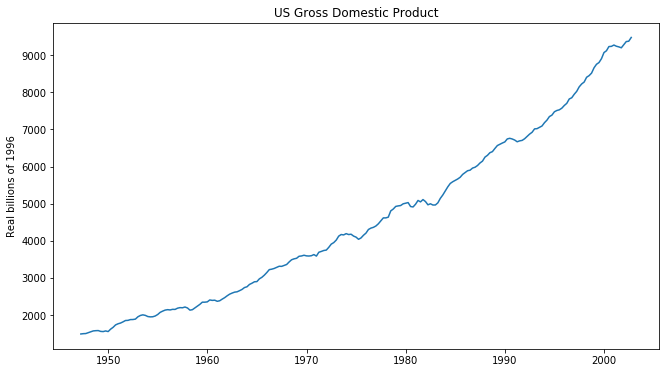

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy  as np
from matplotlib import pyplot

data_set = pd.read_csv('pib.txt', sep = '\t', squeeze = True)
x = data_set.values
index = pd.date_range('1947-01', periods = len(data_set), freq = 'Q')
data = pd.DataFrame({'gdp':x}, index = index)

print(data)

fig, axs= pyplot.subplots(1, 1, figsize=(10.85, 6), sharey=False)
pyplot.plot(data)
pyplot.title('US Gross Domestic Product')
pyplot.ylabel('Real billions of 1996')
#pyplot.xlabel('Time')
pyplot.show()


### Descriptive statistics

In [3]:
from statsmodels.stats.diagnostic import acorr_ljungbox

print(data.describe())                # statistical summarize
print('skewness:', data.skew())       # skewness (3rd moment)
print('kurtosis:', data.kurt())       # kurtosis (4th moment)

# Ljung-Box and Box-Pierce Q Statistics
print('Test of No Serial Correlation\n', acorr_ljungbox(data, lags=20, boxpierce=True, return_df=True))


               gdp
count   223.000000
mean   4572.458296
std    2300.994928
min    1488.900000
25%    2402.150000
50%    4168.100000
75%    6444.700000
max    9477.900000
skewness: gdp    0.492498
dtype: float64
kurtosis: gdp   -0.869914
dtype: float64
Test of No Serial Correlation
         lb_stat      lb_pvalue      bp_stat      bp_pvalue
1    219.474683   1.177523e-49   216.548354   5.120380e-49
2    433.501620   7.350540e-95   426.770368   2.128101e-93
3    641.995901  7.920316e-139   630.631442  2.304821e-136
4    845.055155  1.335016e-181   828.275783  5.759588e-178
5   1042.784503  3.277794e-223  1019.853551  3.023553e-218
6   1235.113267  1.203073e-263  1205.343959  3.337783e-257
7   1421.963732  6.824903e-303  1384.720406  7.809211e-295
8   1603.235554   0.000000e+00  1557.935702   0.000000e+00
9   1778.927556   0.000000e+00  1725.038317   0.000000e+00
10  1948.991076   0.000000e+00  1886.031783   0.000000e+00
11  2113.588583   0.000000e+00  2041.119211   0.000000e+00
12  2272

### Graphical analysis

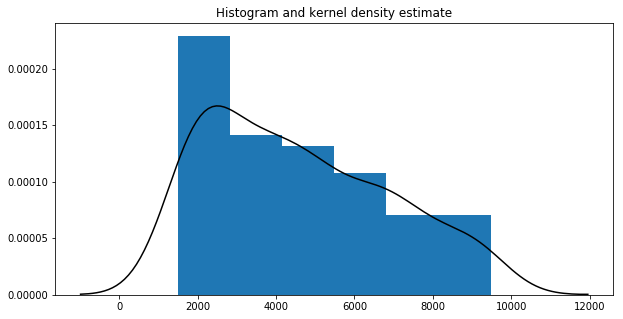

In [7]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot

fig, ax = pyplot.subplots(1, 1, figsize=(10, 5), sharex=True)
sns.distplot(data, color='#1f77b4', hist_kws=dict(alpha=1), kde_kws=dict(color='k'))
pyplot.title('Histogram and kernel density estimate')
pyplot.show()


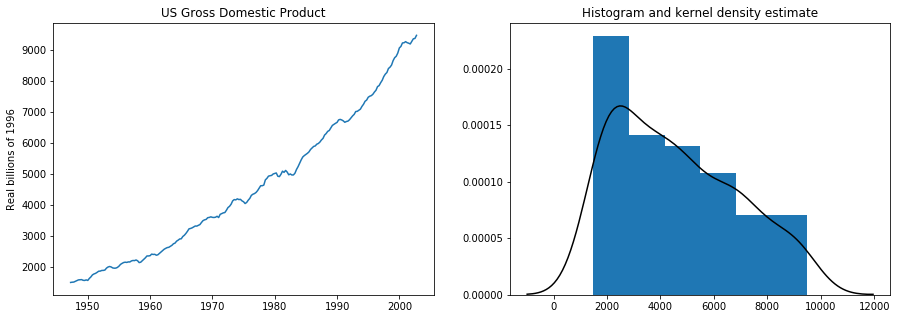

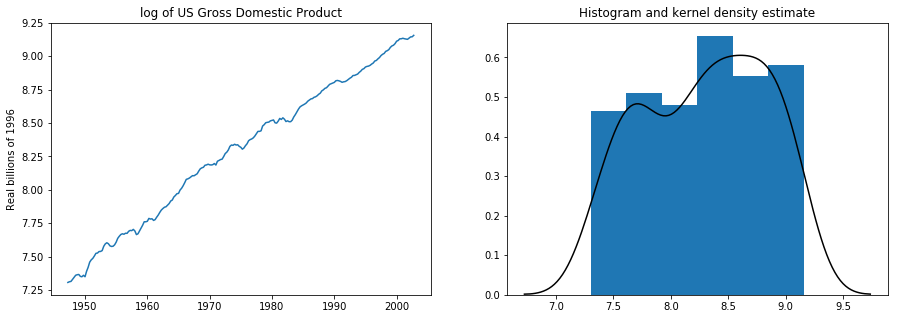

In [8]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot

fig, ax = pyplot.subplots(1, 2, figsize=(15, 5), sharey=False)
ax[0].plot(data)
ax[0].set_title('US Gross Domestic Product')
ax[0].set_ylabel('Real billions of 1996')
#
sns.distplot(data, ax=ax[1], color='#1f77b4', hist_kws=dict(alpha=1), kde_kws=dict(color='k'))
ax[1].set_title('Histogram and kernel density estimate')
pyplot.show()

##

fig, ax = pyplot.subplots(1, 2, figsize=(15, 5), sharey=False)
ax[0].plot(np.log(data))
ax[0].set_title('log of US Gross Domestic Product')
ax[0].set_ylabel('Real billions of 1996')
#
sns.distplot(np.log(data), ax=ax[1], color='#1f77b4', hist_kws=dict(alpha=1), kde_kws=dict(color='k'))
ax[1].set_title('Histogram and kernel density estimate')
pyplot.show()


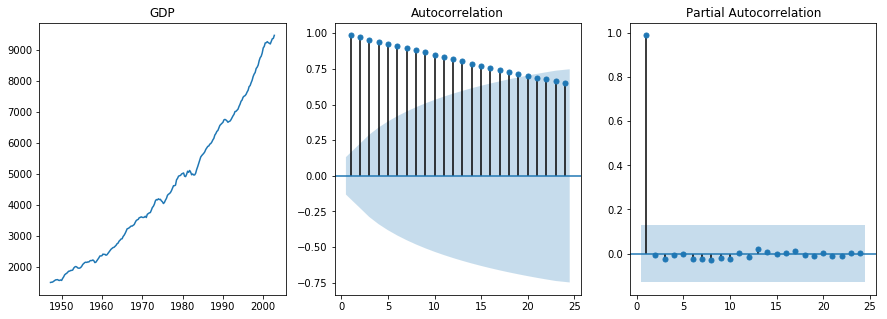

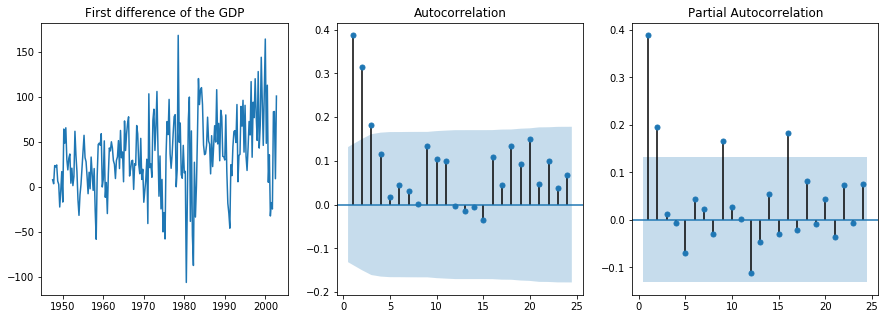

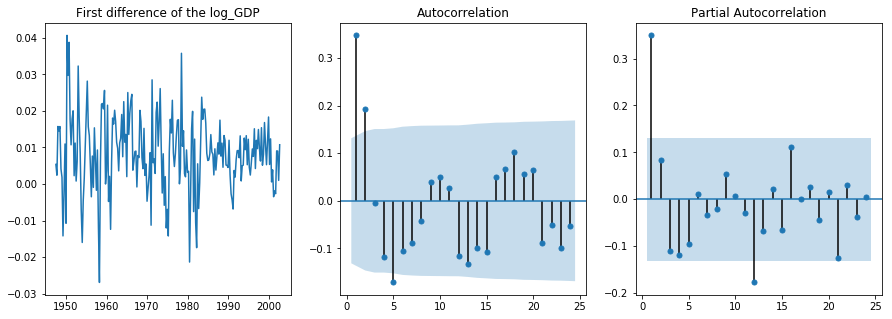

In [9]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.tools import diff

k=24 # lags

# GDP
fig, axs= pyplot.subplots(1, 3, figsize=(15, 5), sharey=False)
axs[0].plot(data)
#axs[0].set_ylabel(r'$\Delta Y_t$')
#axs[0].set_xlabel(r'$t$')
axs[0].set_title('GDP')
fig = plot_acf(data,  lags=k, ax=axs[1], zero = False)
fig = plot_pacf(data, lags=k, ax=axs[2], zero = False)
pyplot.show()

# First difference of GDP
dy = diff(data, k_diff=1, k_seasonal_diff=None, seasonal_periods=1)

k=24 # lags
fig, axs= pyplot.subplots(1, 3, figsize=(15, 5), sharey=False)
axs[0].plot(dy)
#axs[0].set_ylabel(r'$\Delta Y_t$')
#axs[0].set_xlabel(r'$t$')
axs[0].set_title('First difference of the GDP')
fig = plot_acf(dy,  lags=k, ax=axs[1], zero = False)
fig = plot_pacf(dy, lags=k, ax=axs[2], zero = False)
pyplot.show()

# First difference of log(GDP)
dly = diff(np.log(data), k_diff=1, k_seasonal_diff=None, seasonal_periods=1)

k=24 # lags
fig, axs= pyplot.subplots(1, 3, figsize=(15, 5), sharey=False)
axs[0].plot(dly)
#axs[0].set_ylabel(r'$\Delta Y_t$')
#axs[0].set_xlabel(r'$t$')
axs[0].set_title('First difference of the log_GDP')
fig = plot_acf(dly,  lags=k, ax=axs[1], zero = False)
fig = plot_pacf(dly, lags=k, ax=axs[2], zero = False)
pyplot.show()


### ADF unit root test

In [10]:
import numpy as np
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.stattools import adfuller

adf_ur = adfuller(np.log(data), maxlag=6, regression='c', autolag='BIC') # regression{'c','ct','ctt','nc'}

print('ADF Test Results log(GDP):\n')
print('Test statistic: %.3f' %  adf_ur[0])
print('p-value: %.3f' %  adf_ur[1])
print('Used lags:', adf_ur[2])
print('Critical Values:')
for j, q in adf_ur[4].items():
    print('\t%s: %.3f' % (j, q))
    
# First difference of log(GDP)
dly = diff(np.log(data), k_diff=1, k_seasonal_diff=None, seasonal_periods=1)
adf_ur = adfuller(dly, maxlag=6, regression='c', autolag='BIC') # regression{'c','ct','ctt','nc'}

print('\nADF Test Results dlog(GDP):\n')
print('Test statistic: %.3f' %  adf_ur[0])
print('p-value: %.3f' %  adf_ur[1])
print('Used lags:', adf_ur[2])
print('Critical Values:')
for j, q in adf_ur[4].items():
    print('\t%s: %.3f' % (j, q))

ADF Test Results log(GDP):

Test statistic: -1.210
p-value: 0.669
Used lags: 1
Critical Values:
	1%: -3.460
	5%: -2.875
	10%: -2.574

ADF Test Results dlog(GDP):

Test statistic: -10.292
p-value: 0.000
Used lags: 0
Critical Values:
	1%: -3.460
	5%: -2.875
	10%: -2.574


In [11]:
import numpy as np
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.stattools import arma_order_select_ic

dly = diff(np.log(data), k_diff=1, k_seasonal_diff=None, seasonal_periods=1)

print(arma_order_select_ic(dly, max_ar=5, max_ma=3, ic='bic', trend='c'))
#print(arma_order_select_ic(dDy, max_ar=5, max_ma=3, ic='aic', trend='nc'))


/home/user/.conda/envs/p37/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/user/.conda/envs/p37/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


{'bic':              0            1            2            3
0 -1397.869397 -1414.392415 -1418.318792 -1414.538978
1 -1421.012652 -1416.469331 -1413.934730 -1409.147916
2 -1417.112932 -1412.660048 -1414.154990 -1413.499794
3 -1414.439636 -1413.365217 -1410.948426 -1406.659189
4 -1412.058777 -1408.144328 -1402.123666 -1405.821907
5 -1408.590845 -1403.252988 -1397.875293 -1398.630274, 'bic_min_order': (1, 0)}


### Estimation

                             ARIMA Model Results                              
Dep. Variable:                  D.gdp   No. Observations:                  222
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 718.610
Method:                       css-mle   S.D. of innovations              0.010
Date:                Wed, 18 Mar 2020   AIC                          -1431.221
Time:                        12:50:03   BIC                          -1421.013
Sample:                    06-30-1947   HQIC                         -1427.099
                         - 09-30-2002                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0083      0.001      8.560      0.000       0.006       0.010
ar.L1.D.gdp     0.3466      0.063      5.523      0.000       0.224       0.470
                                    Roots       

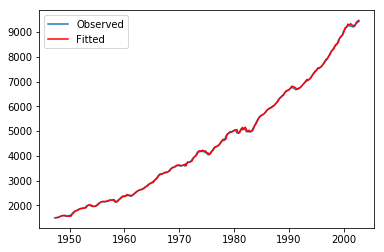

                             ARIMA Model Results                              
Dep. Variable:                  D.gdp   No. Observations:                  222
Model:                 ARIMA(0, 1, 2)   Log Likelihood                 719.965
Method:                       css-mle   S.D. of innovations              0.009
Date:                Wed, 18 Mar 2020   AIC                          -1431.930
Time:                        12:50:03   BIC                          -1418.319
Sample:                    06-30-1947   HQIC                         -1426.434
                         - 09-30-2002                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0083      0.001      8.742      0.000       0.006       0.010
ma.L1.D.gdp     0.3028      0.065      4.627      0.000       0.175       0.431
ma.L2.D.gdp     0.2036      0.064      3.160    

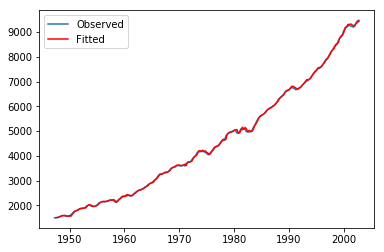

In [12]:
import numpy as np
from statsmodels.tsa.arima_model   import ARIMA, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic  import acorr_ljungbox

from matplotlib import pyplot

# ARIMA(1,1,0)
model = ARIMA(np.log(data), order=(1,1,0)).fit(trend = 'c')    # trend = {'c','nc'}
print(model.summary())
print('AIC: %.3f' % model.aic, '\nBIC: %.3f' % model.bic, '\nHQIC: %.3f' % model.hqic, '\nlogL: %.3f' % model.llf)

lgdp_fit = model.predict(typ='levels') #typ={'levels', 'linear'}

pyplot.plot(data, label='Observed')
pyplot.plot(np.exp(lgdp_fit), label='Fitted', color='r')
pyplot.legend(loc='upper left')
pyplot.show()

# ARIMA(0,1,2)
model = ARIMA(np.log(data), order=(0,1,2)).fit(trend = 'c')    # trend = {'c','nc'}
print(model.summary())
print('AIC: %.3f' % model.aic, '\nBIC: %.3f' % model.bic, '\nHQIC: %.3f' % model.hqic, '\nlogL: %.3f' % model.llf)

lgdp_fit = model.predict(typ='levels') #typ={'levels', 'linear'}

pyplot.plot(data, label='Observed')
pyplot.plot(np.exp(lgdp_fit), label='Fitted', color='r')
pyplot.legend(loc='upper left')
pyplot.show()


### Diagnostics

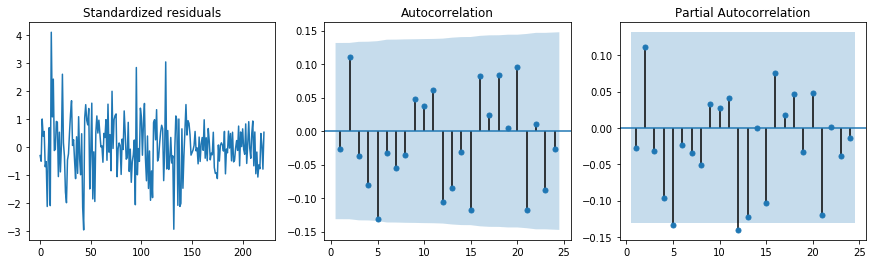

Test of No Serial Correlation
       lb_stat  lb_pvalue    bp_stat  bp_pvalue
1    0.164173   0.685343   0.161974   0.687345
2    2.961756   0.227438   2.909600   0.233447
3    3.272254   0.351523   3.213168   0.359912
4    4.731761   0.315944   4.633581   0.327001
5    8.652022   0.123775   8.431333   0.134012
6    8.903741   0.179064   8.674063   0.192755
7    9.592028   0.212895   9.334696   0.229511
8    9.884637   0.273217   9.614241   0.293151
9   10.430334   0.316783  10.133140   0.339815
10  10.748399   0.377453  10.434167   0.403263
11  11.626784   0.392340  11.261574   0.421617
12  14.309712   0.281369  13.776819   0.315187
13  16.003441   0.248944  15.357128   0.285592
14  16.241950   0.298823  15.578602   0.339780
15  19.601925   0.187741  18.683578   0.228432
16  21.211898   0.170509  20.164178   0.212917
17  21.345375   0.211221  20.286334   0.259846
18  23.055356   0.188472  21.843637   0.239001
19  23.060118   0.234704  21.847954   0.291889
20  25.334970   0.188915  23.

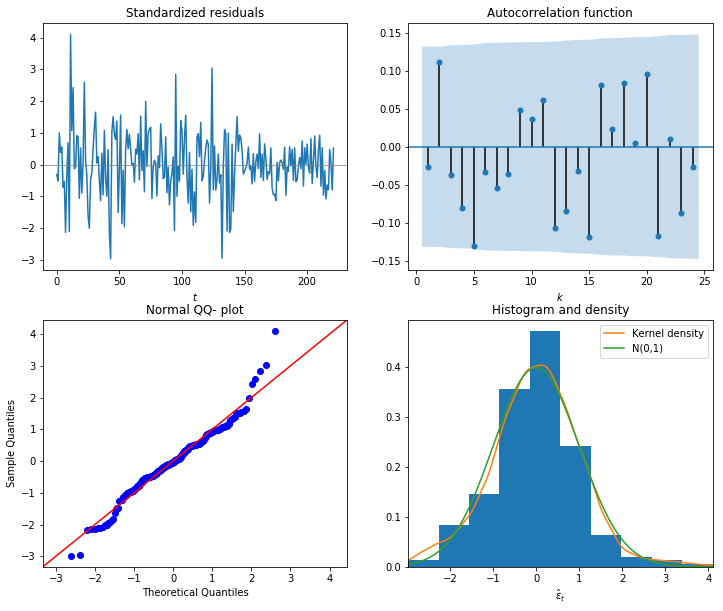

In [13]:
from sklearn.neighbors import KernelDensity
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.diagnostic import acorr_ljungbox
from matplotlib import pyplot

model = ARIMA(np.log(data), order=(1,1,0)).fit(trend = 'c')  # ARIMA(1,1,0)
#model = ARIMA(np.log(data), order=(0,1,2)).fit(trend = 'c')  # ARIMA(0,1,2)

k=24
# residuals
res = model.resid
res = res.values/np.std(res.values) # standardized residuals

fig, axs= pyplot.subplots(1, 3, figsize=(15, 4), sharey=False)
axs[0].plot(res)
#axs[0].set_ylabel(r'$\hat{\varepsilon}_t$')
#axs[0].set_xlabel(r'$t$')
axs[0].set_title('Standardized residuals')
fig = plot_acf(res,  lags=k, ax=axs[1], zero=False)
fig = plot_pacf(res, lags=k, ax=axs[2], zero=False)
pyplot.show()

# Ljung-Box and Box-Pierce Q Statistics
print('Test of No Serial Correlation\n',acorr_ljungbox(res, lags=k, boxpierce=True, return_df=True))

# Jarque-Bera test of normality
jb = jarque_bera(res)


print('\nTest of normality:\n')
print('JB statistic: %.3f' %  jb[0])
print('p-value: %.3f'  % jb[1])
print('Skewness: %.3f' % jb[2])
print('Kurtosis: %.3f' % jb[3])

fig, axs= pyplot.subplots(2, 2, figsize=(12, 10), sharey=False)
axs[0,0].plot(res)
axs[0,0].axhline(0, linestyle='-', color='gray',  linewidth=0.7)
#axs[0,0].set_xlim(0,len(res))
#axs[0,0].set_ylabel(r'$\hat{\varepsilon}_t$')
axs[0,0].set_xlabel(r'$t$')
axs[0,0].set_title('Standardized residuals')

# ACF
fig = plot_acf(res,  lags=k, ax=axs[0,1], zero=False)
axs[0,1].set_xlabel(r'$k$')
axs[0,1].set_title('Autocorrelation function')

# Q-Q Plot
fig =  qqplot(res, line ='45', ax=axs[1,0])
#axs[1,0].set_ylim(-3,3.5)
#axs[1,0].set_xlim(-2.8,2.8)
axs[1,0].set_title('Normal QQ- plot')

# Histogram and density
res = res.reshape(res.shape[0],1)
res_d = np.linspace(res.min(), res.max(), 1000)[:, np.newaxis] # generate N points between the min() and max() of x
f_hat = KernelDensity(kernel='epanechnikov').fit(res) # fit the kernel density estimation on x
log_dens = f_hat.score_samples(res_d) # score_samples returns the log of the estimated probability density
axs[1,1].hist(res, density=True)                                                       # histogram
axs[1,1].plot(res_d, np.exp(log_dens), label = 'Kernel density')                       # kernel density
axs[1,1].plot(np.arange(np.min(res),np.max(res), 0.001), stats.norm.pdf(np.arange(np.min(res),np.max(res), 0.001), 0, 1),  label = 'N(0,1)') # N(0,1)
axs[1,1].set_xlim(np.min(res),np.max(res))
axs[1,1].set_xlabel(r'$\hat{\varepsilon}_t$')
axs[1,1].legend(loc='upper right')
axs[1,1].set_title('Histogram and density')
pyplot.show()

### Forecasting

In [14]:
import numpy as np
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
from sklearn.metrics import mean_squared_error

x = np.log(data.gdp)
h = 9         # h-step ahead horizont
n = len(x) - h # number of train observations
train, test = x[0:n], x[n:len(x)]

history = [x for x in train]
forecasts = list()
ci = list()
for t in range(h):
    model = ARIMA(history, order=(1,1,0)).fit(trend = 'c') # training
    output = model.forecast()
    x_f = output[0]  # forecasts
    ci_f = output[2] # forecast confidence interval
    forecasts.append(x_f)
    ci.append(ci_f)
    obs = test[t]
    history.append(obs)
    print('Expected = %f, Forecasted = %f'  % (obs, x_f))

print('MSE: %.3f, RMSE: %.3f' % (mean_squared_error(test, forecasts), np.sqrt(mean_squared_error(test, forecasts))))


Expected = 9.131102, Forecasted = 9.140403
Expected = 9.134970, Forecasted = 9.136897
Expected = 9.131481, Forecasted = 9.141879
Expected = 9.129597, Forecasted = 9.135802
Expected = 9.126937, Forecasted = 9.134407
Expected = 9.135994, Forecasted = 9.131407
Expected = 9.145002, Forecasted = 9.144591
Expected = 9.145983, Forecasted = 9.153584
Expected = 9.156718, Forecasted = 9.151736
MSE: 0.000, RMSE: 0.007


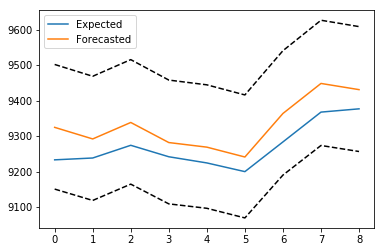

In [15]:
ci = np.array(ci).reshape(-1, 2)
pyplot.plot(np.exp(np.log(data[(len(data)-10):len(data)-1]).values), label='Expected')
pyplot.plot(np.exp(forecasts), label='Forecasted')
pyplot.plot(np.exp(ci), '--', color='k')
pyplot.legend()
pyplot.show()